In [18]:
import cv2
from matplotlib import pyplot as plt

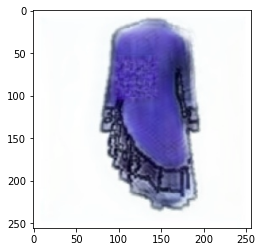

In [19]:
#convert input sketch to canny 
#path should be changed here
img = cv2.imread("C:/Users/ASUS/Desktop/1.jpg") #path to cloth folder
plt.imshow(img)

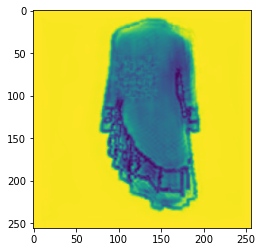

In [20]:
# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

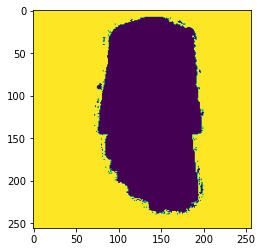

In [21]:
# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]
plt.imshow(mask)

In [22]:
# negate mask
mask = 255 - mask

In [23]:
import numpy as np

In [24]:
# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

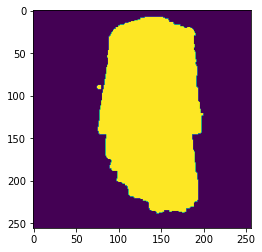

In [25]:
plt.imshow(mask)

In [26]:
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

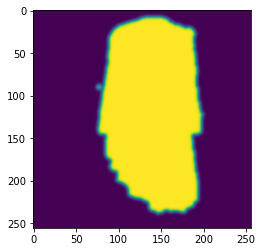

In [27]:
plt.imshow(mask)

In [28]:
# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

In [29]:
# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

In [30]:
# save resulting masked image
cv2.imwrite('8.png', result)

True

In [31]:
# cv2.imshow("INPUT", img)
# cv2.imshow("GRAY", gray)
# cv2.imshow("MASK", mask)
#cv2.imshow("RESULT", result)

In [32]:
#plt.imshow(result)

In [33]:
#results =  cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)

In [34]:
#plt.imshow(results)